### Visualización

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns


import folium 
from folium.plugins import HeatMap

In [3]:
df = pd.read_csv('./iFlowDatos_Limpios.csv')
df.head()

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,...,Bultos,Peso,Unidades,VisitaPlanificadaFecha,VisitaPlanificadaDia,VisitaPlanificadaHora,VisitaFecha,VisitaDia,VisitaHora_Inicio,VisitaHora_Fin
0,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2.516667,24.910,30,2024-05-23,Thursday,12:06:00,2024-05-23,Thursday,14:13:53,14:14:53
1,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2.866667,26.260,38,2024-05-10,Friday,12:05:00,2024-05-10,Friday,16:43:00,16:43:00
2,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2.400000,24.888,32,2024-05-30,Thursday,12:03:00,2024-05-30,Thursday,09:41:36,09:50:08
3,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,1.800000,14.040,28,2024-06-13,Thursday,12:14:00,2024-06-13,Thursday,13:32:55,13:39:55
4,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2.116667,14.377,31,2024-06-27,Thursday,12:27:00,2024-06-27,Thursday,15:36:00,15:36:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27478 entries, 0 to 27477
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   iddomicilioorden        27478 non-null  int64  
 1   direccion               27478 non-null  object 
 2   provincia               27478 non-null  object 
 3   municipio               27478 non-null  object 
 4   localidad               27478 non-null  object 
 5   InicioHorario1          27478 non-null  int64  
 6   FinHorario1             27478 non-null  int64  
 7   latitud                 27478 non-null  float64
 8   longitud                27478 non-null  float64
 9   cliente                 27478 non-null  int64  
 10  mes                     27426 non-null  object 
 11  Bultos                  27478 non-null  float64
 12  Peso                    27478 non-null  float64
 13  Unidades                27478 non-null  int64  
 14  VisitaPlanificadaFecha  27478 non-null

### Análisis Univariado

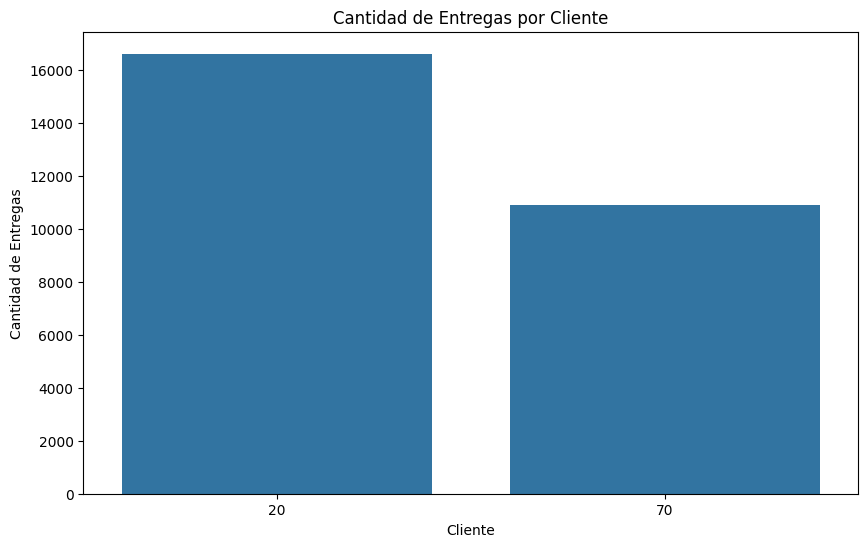

In [5]:
entregas_por_cliente = df.groupby('cliente').size().reset_index(name='cantidad_entregas')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='cliente', y='cantidad_entregas', data=entregas_por_cliente)

# Añadir etiquetas y título
plt.xlabel('Cliente')
plt.ylabel('Cantidad de Entregas')
plt.title('Cantidad de Entregas por Cliente')

# Mostrar el gráfico
plt.show()

Hay una diferencia aproximada de 5000 entregas de diferencia entre clientes

C:\Users\anapa\AppData\Local\Temp\ipykernel_16164\1657004932.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  entregas_por_cliente_peso = df.groupby(['cliente', 'categoria_peso']).size().unstack(fill_value=0)


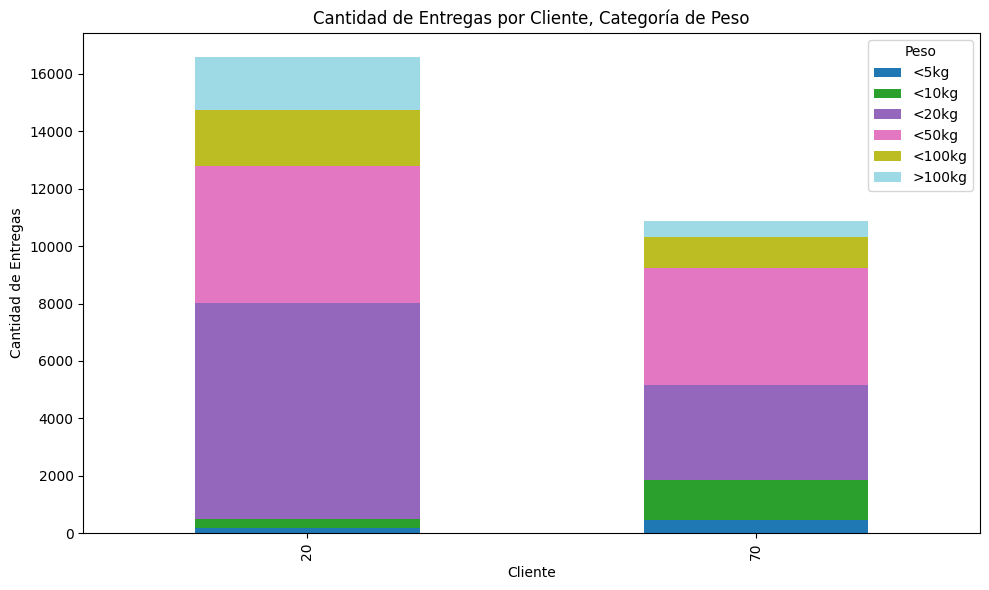

In [6]:
# Categorizar el peso en las clases mencionadas
bins = [0, 5, 10, 20, 50, 100, float('inf')]  # Límites de las categorías
labels = ['<5kg', '<10kg', '<20kg', '<50kg', '<100kg', '>100kg']  # Etiquetas
df['categoria_peso'] = pd.cut(df['Peso'], bins=bins, labels=labels, right=False)

# Agrupar por cliente y categoría de peso, y contar las entregas
entregas_por_cliente_peso = df.groupby(['cliente', 'categoria_peso']).size().unstack(fill_value=0)

# Crear el gráfico de barras apiladas
entregas_por_cliente_peso.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

# Añadir etiquetas y título
plt.xlabel('Cliente')
plt.ylabel('Cantidad de Entregas')
plt.title('Cantidad de Entregas por Cliente, Categoría de Peso')
plt.legend(title='Peso')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

C:\Users\anapa\AppData\Local\Temp\ipykernel_16164\3872089311.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  entregas_por_peso_cliente = df.groupby(['categoria_peso', 'cliente']).size().unstack(fill_value=0)


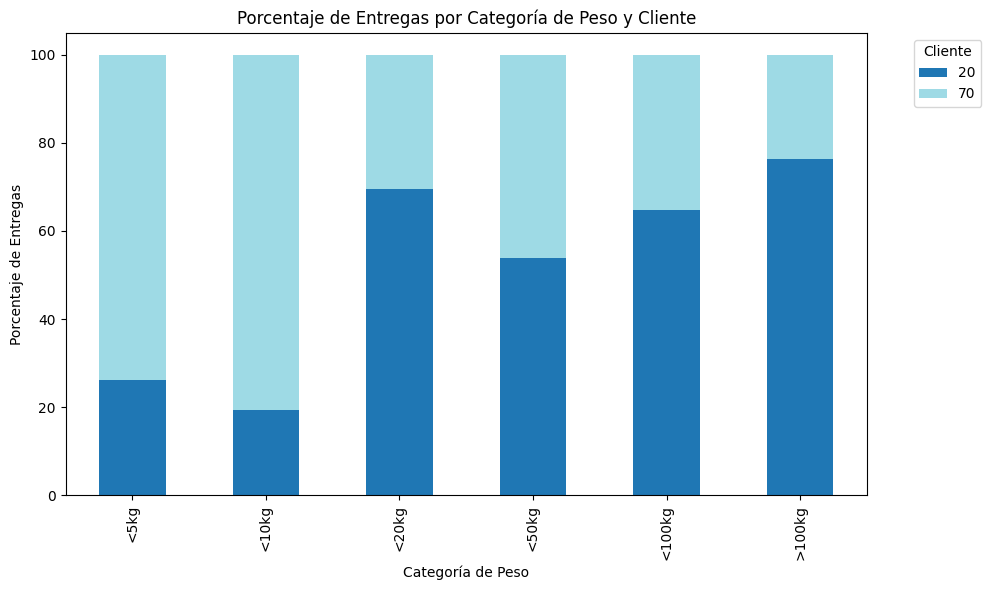

In [7]:
entregas_por_peso_cliente = df.groupby(['categoria_peso', 'cliente']).size().unstack(fill_value=0)

# Convertir a porcentajes por categoría de peso
entregas_por_peso_cliente_pct = entregas_por_peso_cliente.div(entregas_por_peso_cliente.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras apiladas
entregas_por_peso_cliente_pct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

# Añadir etiquetas y título
plt.xlabel('Categoría de Peso')
plt.ylabel('Porcentaje de Entregas')
plt.title('Porcentaje de Entregas por Categoría de Peso y Cliente')
plt.legend(title='Cliente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

El cliente 70 tiene la mayoria de las entregas mas livianas (menos de 10 kilos)
Mientras que para los pesos mayores a 10kg, el cliente 20 predomina

C:\Users\anapa\AppData\Local\Temp\ipykernel_16164\2603022804.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  entregas_por_cliente_peso = df.groupby(['cliente', 'categoria_peso']).size().unstack(fill_value=0)


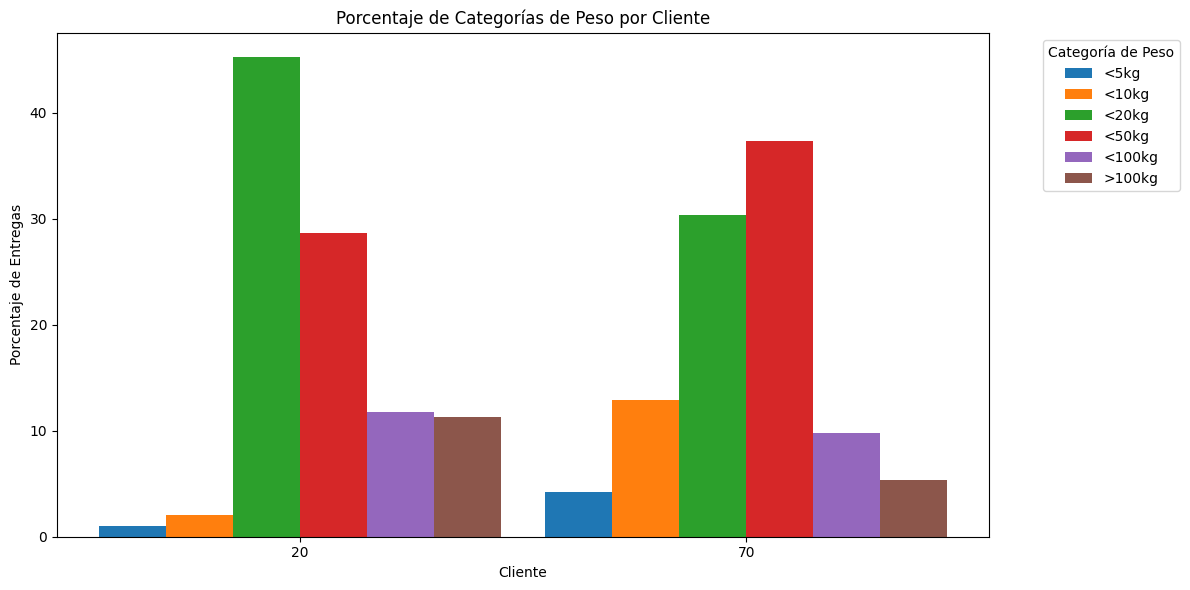

In [8]:
# Agrupar por cliente y categoría de peso, y contar las entregas
entregas_por_cliente_peso = df.groupby(['cliente', 'categoria_peso']).size().unstack(fill_value=0)

# Convertir a porcentajes por cliente
entregas_por_cliente_peso_pct = entregas_por_cliente_peso.div(entregas_por_cliente_peso.sum(axis=1), axis=0) * 100

# Crear las posiciones para cada barra agrupada
clientes = entregas_por_cliente_peso_pct.index
categorias_peso = entregas_por_cliente_peso_pct.columns
n_clientes = len(clientes)
n_categorias = len(categorias_peso)
bar_width = 0.15  # Ancho de cada barra
r = np.arange(n_clientes)  # Posiciones de los clientes en el eje x

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(12, 6))

for i, categoria in enumerate(categorias_peso):
    plt.bar(r + i * bar_width, entregas_por_cliente_peso_pct[categoria], width=bar_width, label=categoria)

# Añadir etiquetas y título
plt.xlabel('Cliente')
plt.ylabel('Porcentaje de Entregas')
plt.title('Porcentaje de Categorías de Peso por Cliente')
plt.xticks(r + bar_width * (n_categorias - 1) / 2, clientes)  # Ajustar las posiciones del eje x para los clientes
plt.legend(title='Categoría de Peso', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

La mayoria de entregas para ambos clientes varian entre 10-50kg

C:\Users\anapa\AppData\Local\Temp\ipykernel_16164\1453322605.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  entregas_por_cliente_peso = df.groupby(['provincia', 'categoria_peso']).size().unstack(fill_value=0)


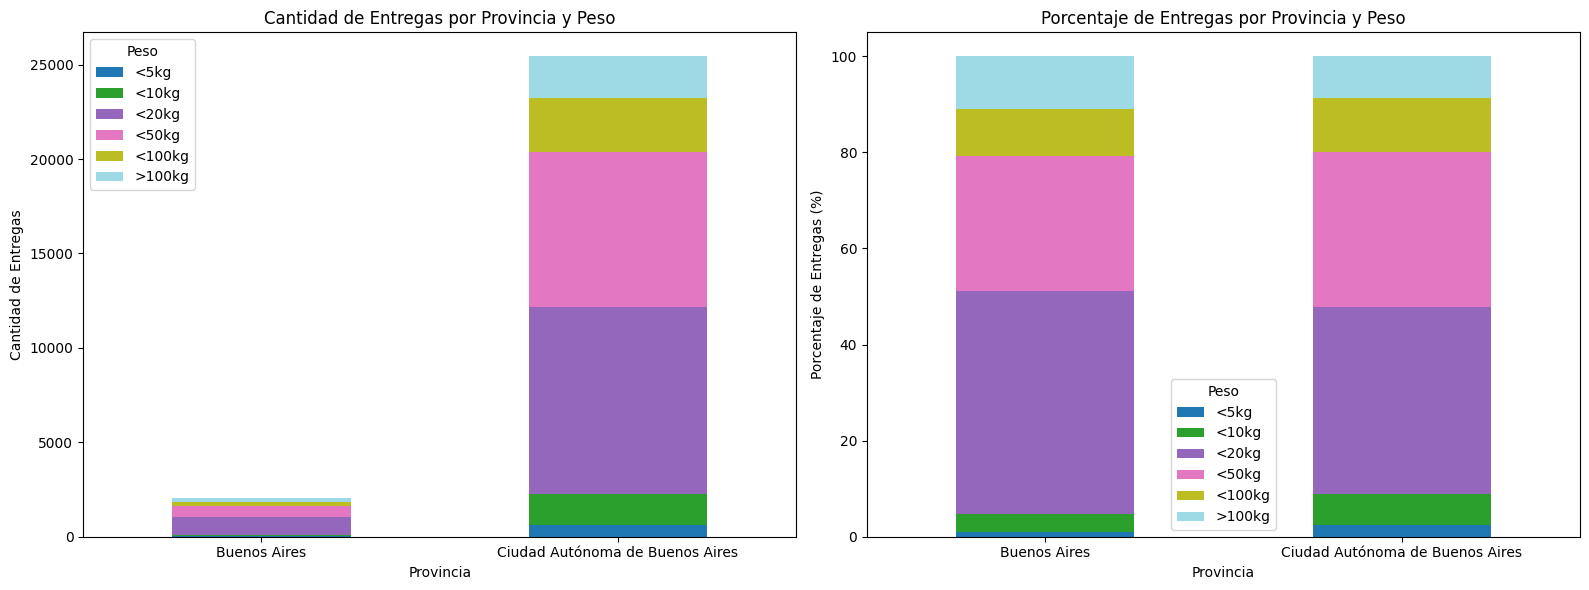

In [10]:


# Agrupar por provincia y categoría de peso, y contar las entregas
entregas_por_cliente_peso = df.groupby(['provincia', 'categoria_peso']).size().unstack(fill_value=0)

# Crear los subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Cantidad de entregas por provincia y categoría de peso (gráfico original)
entregas_por_cliente_peso.plot(kind='bar', stacked=True, ax=axes[0], colormap='tab20')
axes[0].set_xlabel('Provincia')
axes[0].set_ylabel('Cantidad de Entregas')
axes[0].set_title('Cantidad de Entregas por Provincia y Peso')
axes[0].legend(title='Peso')
axes[0].tick_params(axis='x', rotation=0)

# Gráfico 2: Porcentaje de entregas por provincia y categoría de peso
# Calcular porcentajes
porcentaje_entregas = entregas_por_cliente_peso.div(entregas_por_cliente_peso.sum(axis=1), axis=0) * 100

# Crear gráfico de barras apiladas para porcentajes
porcentaje_entregas.plot(kind='bar', stacked=True, ax=axes[1], colormap='tab20')
axes[1].set_xlabel('Provincia')
axes[1].set_ylabel('Porcentaje de Entregas (%)')
axes[1].set_title('Porcentaje de Entregas por Provincia y Peso')
axes[1].legend(title='Peso')
axes[1].tick_params(axis='x', rotation=0)

# Ajustar el layout
plt.tight_layout()

# Mostrar los gráficos
plt.show()

### Análisis Bivariado

#### Relaciones entre Bulto,Peso y Unidades por Cliente

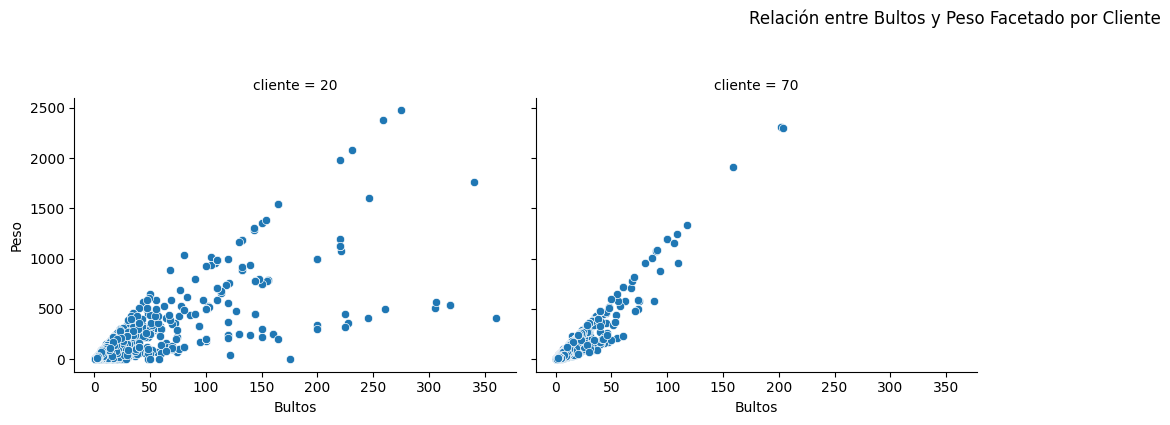

In [11]:
# Crear el FacetGrid, facetando por cliente
g = sns.FacetGrid(df, col='cliente', col_wrap=4, height=4, aspect=1.2)
g.map(sns.scatterplot, 'Bultos', 'Peso')

# Añadir título general
g.fig.suptitle('Relación entre Bultos y Peso Facetado por Cliente', y=1.05)

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

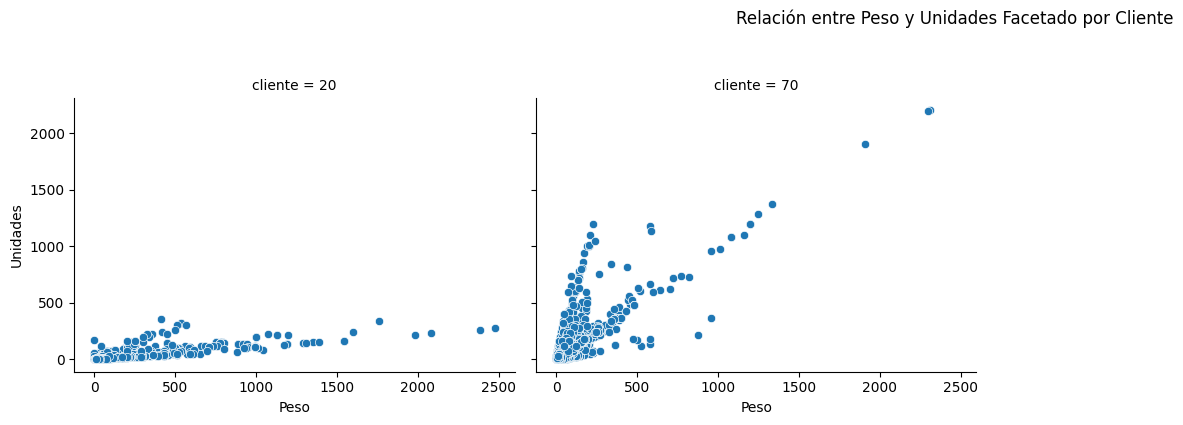

In [12]:
# Crear el FacetGrid, facetando por cliente
g = sns.FacetGrid(df, col='cliente', col_wrap=4, height=4, aspect=1.2)
g.map(sns.scatterplot, 'Peso', 'Unidades')

# Añadir título general
g.fig.suptitle('Relación entre Peso y Unidades Facetado por Cliente', y=1.05)

# Ajustar el layout
plt.tight_layout()
# plt.ylim(0,500)
# Mostrar el gráfico
plt.show()

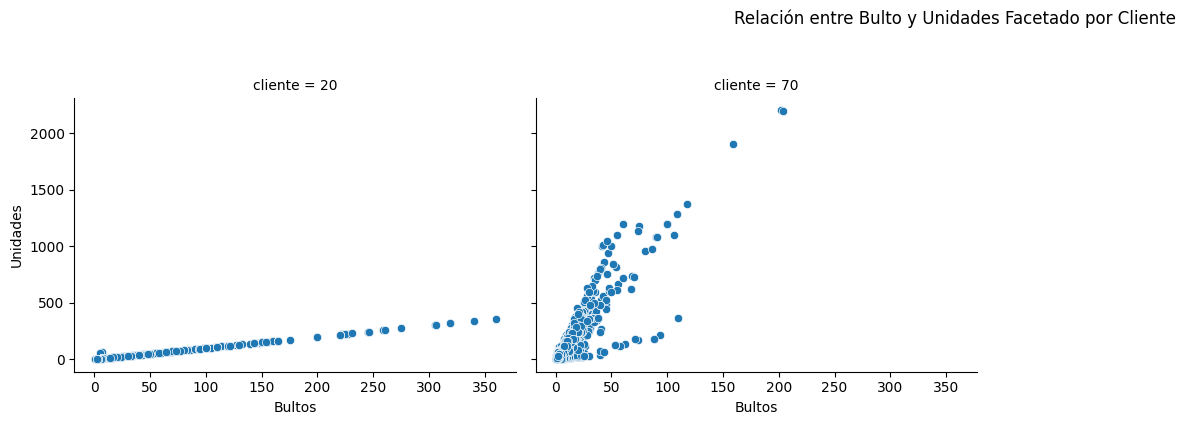

In [13]:
# Crear el FacetGrid, facetando por cliente
g = sns.FacetGrid(df, col='cliente', col_wrap=4, height=4, aspect=1.2)
g.map(sns.scatterplot, 'Bultos', 'Unidades')

# Añadir título general
g.fig.suptitle('Relación entre Bulto y Unidades Facetado por Cliente', y=1.05)

# Ajustar el layout
plt.tight_layout()
# plt.ylim(0,500)
# Mostrar el gráfico
plt.show()

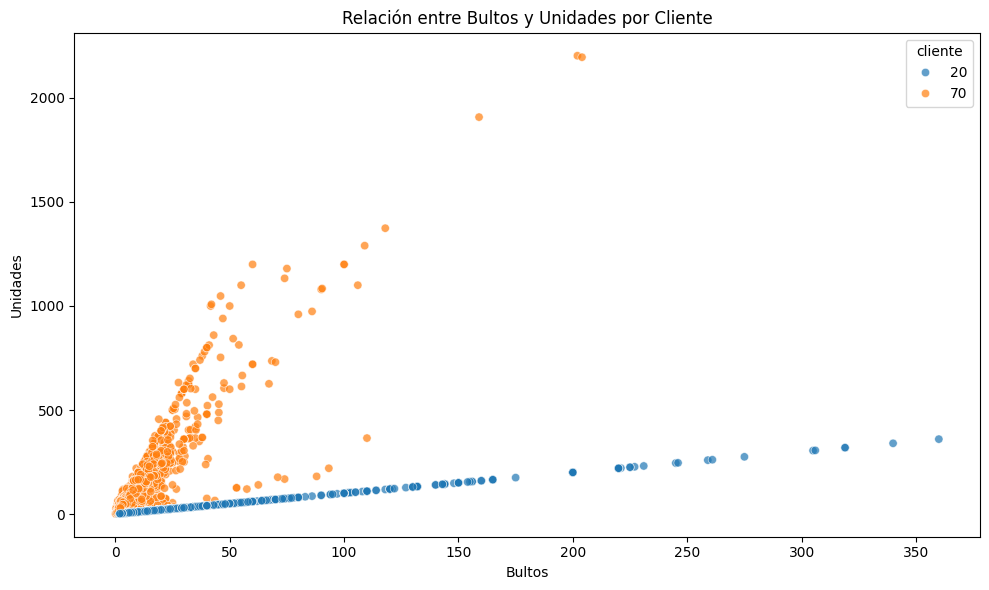

In [14]:
# Crear el scatter plot de Bultos vs Unidades, coloreado por cliente
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Bultos', y='Unidades', hue='cliente', palette='tab10', alpha=0.7)

# Añadir etiquetas y título
plt.xlabel('Bultos')
plt.ylabel('Unidades')
plt.title('Relación entre Bultos y Unidades por Cliente')

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

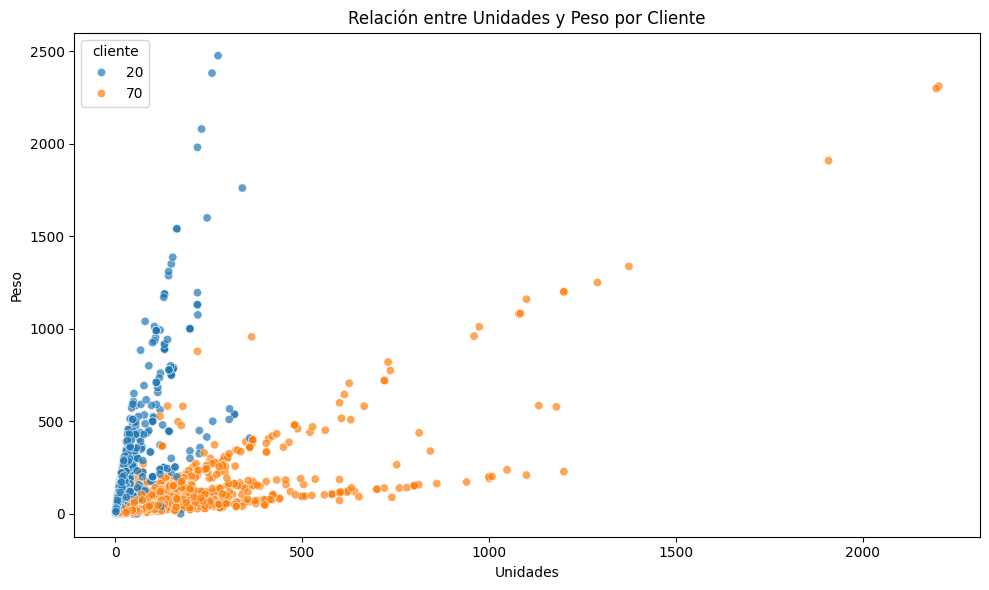

In [15]:
# Crear el scatter plot de Bultos vs Unidades, coloreado por cliente
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Unidades', y='Peso', hue='cliente', palette='tab10', alpha=0.7)

# Añadir etiquetas y título
plt.xlabel('Unidades')
plt.ylabel('Peso')
plt.title('Relación entre Unidades y Peso por Cliente')

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

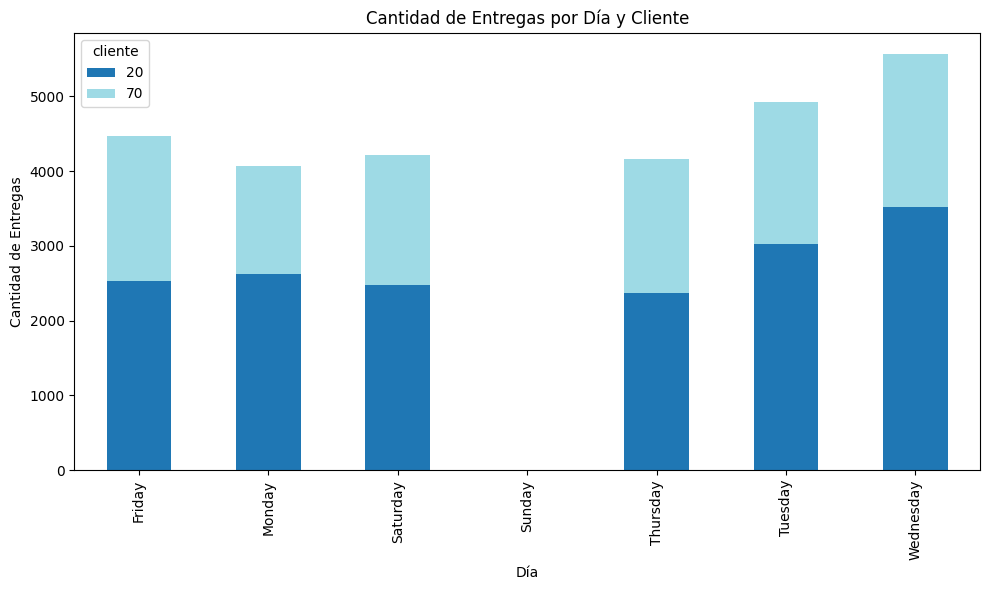

In [16]:
# Agrupar por día y cliente, y contar las entregas
entregas_por_dia_cliente = df.groupby(['VisitaDia', 'cliente']).size().unstack(fill_value=0)

# Crear el gráfico de barras apiladas
entregas_por_dia_cliente.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

# Añadir etiquetas y título
plt.xlabel('Día')
plt.ylabel('Cantidad de Entregas')
plt.title('Cantidad de Entregas por Día y Cliente')

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### Estudiemos la tardanza...

In [17]:
df['VisitaHora_Fin'] = pd.to_datetime(df['VisitaHora_Fin'])
df['VisitaHora_Inicio'] = pd.to_datetime(df['VisitaHora_Inicio'])
df['Demora_Inicio_Fin'] = round((df['VisitaHora_Fin'] - df['VisitaHora_Inicio']).dt.seconds.div(60),2)

C:\Users\anapa\AppData\Local\Temp\ipykernel_16164\2113458761.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['VisitaHora_Fin'] = pd.to_datetime(df['VisitaHora_Fin'])
C:\Users\anapa\AppData\Local\Temp\ipykernel_16164\2113458761.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['VisitaHora_Inicio'] = pd.to_datetime(df['VisitaHora_Inicio'])


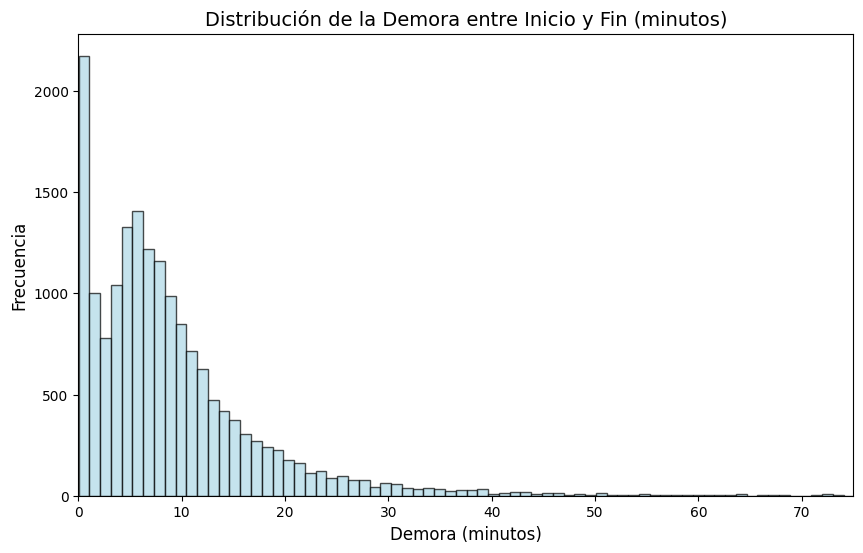

In [18]:
df_filtrado = df[df['Demora_Inicio_Fin'] > 0]
plt.figure(figsize=(10,6))
plt.hist(df_filtrado['Demora_Inicio_Fin'], bins=375, color='lightblue', alpha=0.7, edgecolor='black')
plt.title('Distribución de la Demora entre Inicio y Fin (minutos)', fontsize=14)
plt.xlabel('Demora (minutos)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xlim(0, 75)
plt.show()

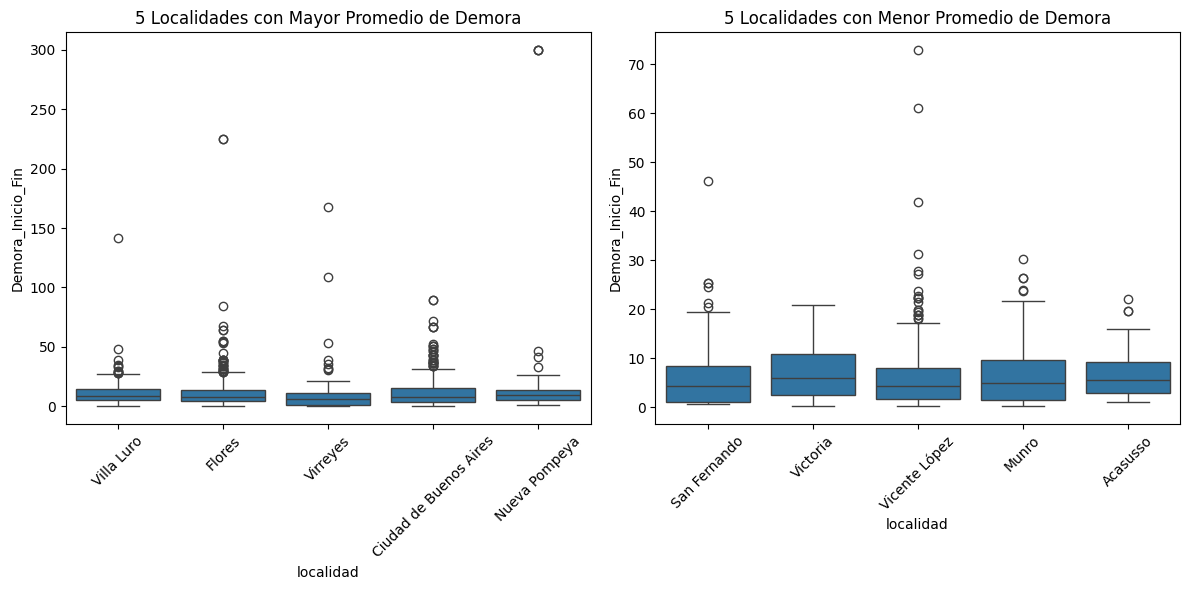

In [19]:
# Paso 1: Filtrar localidades con al menos 20 registros
conteo_localidades = df_filtrado['localidad'].value_counts()
localidades_con_mas_20_registros = conteo_localidades[conteo_localidades >= 20].index

# Filtrar el dataframe para quedarnos solo con las localidades con al menos 20 registros
df_filtrado_20 = df_filtrado[df_filtrado['localidad'].isin(localidades_con_mas_20_registros)]

# Paso 2: Agrupar por localidad y calcular el promedio de la demora
promedio_demora = df_filtrado_20.groupby('localidad')['Demora_Inicio_Fin'].mean().reset_index()

# Paso 3: Seleccionar las 5 localidades con mayor y menor promedio de demora
top_5_localidades_mayor = promedio_demora.nlargest(5, 'Demora_Inicio_Fin')
top_5_localidades_menor = promedio_demora.nsmallest(5, 'Demora_Inicio_Fin')

# Paso 4: Filtrar los datos originales para incluir solo las localidades seleccionadas
df_mayor_demora = df_filtrado_20[df_filtrado_20['localidad'].isin(top_5_localidades_mayor['localidad'])]
df_menor_demora = df_filtrado_20[df_filtrado_20['localidad'].isin(top_5_localidades_menor['localidad'])]

# Paso 5: Crear los dos boxplots
plt.figure(figsize=(12, 6))

# Boxplot para las 5 localidades con mayor demora
plt.subplot(1, 2, 1)
sns.boxplot(x='localidad', y='Demora_Inicio_Fin', data=df_mayor_demora)
plt.xticks(rotation=45)
plt.title('5 Localidades con Mayor Promedio de Demora')

# Boxplot para las 5 localidades con menor demora
plt.subplot(1, 2, 2)
plt.xticks(rotation=45)
sns.boxplot(x='localidad', y='Demora_Inicio_Fin', data=df_menor_demora)
plt.title('5 Localidades con Menor Promedio de Demora')

plt.tight_layout()
plt.show()

Veamos la demora promedio por localidad

C:\Users\anapa\AppData\Local\Temp\ipykernel_16164\464189147.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Demora_Inicio_Fin', y='localidad', data=promedio_demora, palette='viridis')


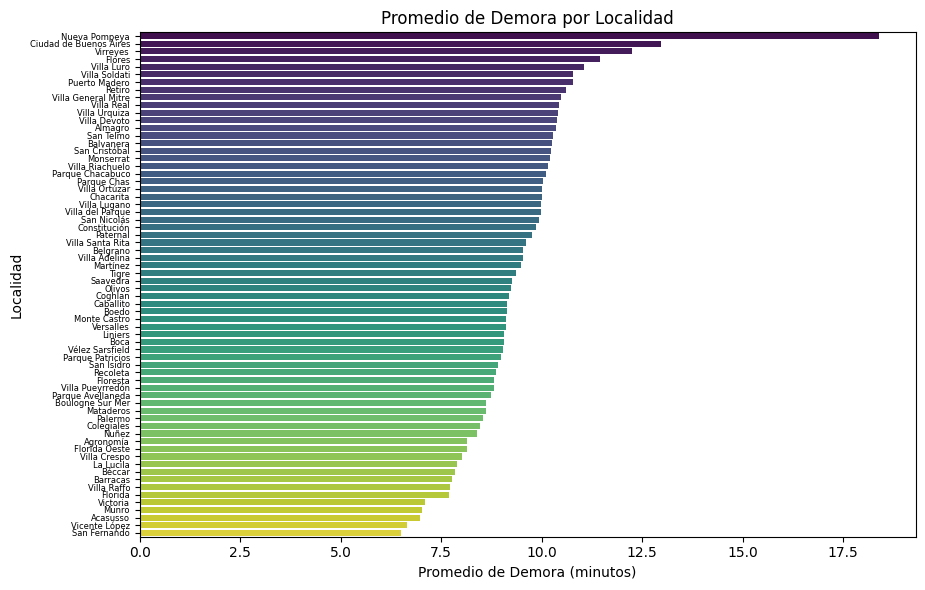

In [20]:
# Calcular el promedio de demora por localidad
promedio_demora = df_filtrado_20.groupby('localidad')['Demora_Inicio_Fin'].mean().reset_index()

# Ordenar las localidades de mayor a menor promedio de demora
promedio_demora = promedio_demora.sort_values(by='Demora_Inicio_Fin', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Demora_Inicio_Fin', y='localidad', data=promedio_demora, palette='viridis')

# Personalizar el gráfico
plt.title('Promedio de Demora por Localidad')
plt.xlabel('Promedio de Demora (minutos)')
plt.ylabel('Localidad')

plt.tight_layout()
plt.yticks(fontsize=6)  # Ajusta el tamaño de la fuente aquí
plt.show()

¿Cuales son las localidades con más demoras atipicas?

C:\Users\anapa\AppData\Local\Temp\ipykernel_16164\767925218.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='outliers', y='localidad', data=outliers_df, palette='viridis')


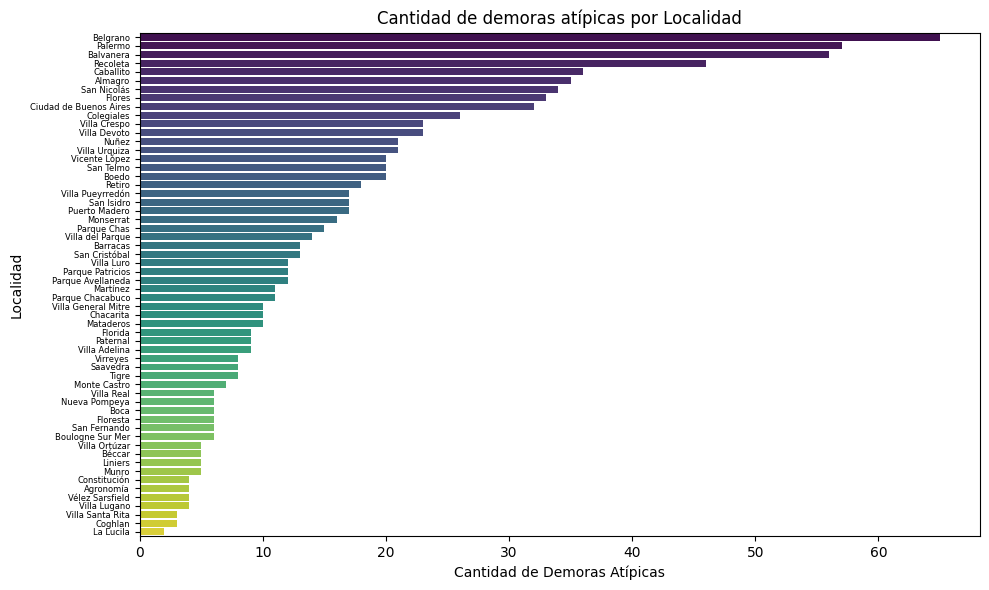

In [21]:
# Paso 1: Filtrar localidades con al menos 20 registros
conteo_localidades = df_filtrado['localidad'].value_counts()
localidades_con_mas_20_registros = conteo_localidades[conteo_localidades >= 50].index
df_filtrado_20 = df_filtrado[df_filtrado['localidad'].isin(localidades_con_mas_20_registros)]

# Paso 2: Calcular los outliers por localidad
outliers_count = []

# Calcular IQR y determinar los outliers para cada localidad
for localidad in df_filtrado_20['localidad'].unique():
    datos_localidad = df_filtrado_20[df_filtrado_20['localidad'] == localidad]['Demora_Inicio_Fin']
    
    Q1 = datos_localidad.quantile(0.25)
    Q3 = datos_localidad.quantile(0.75)
    IQR = Q3 - Q1
    
    # Determinar los límites inferior y superior
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Contar los outliers
    outliers = datos_localidad[(datos_localidad < limite_inferior) | (datos_localidad > limite_superior)]
    outliers_count.append({
        'localidad': localidad,
        'outliers': len(outliers)
    })

# Crear un DataFrame con la cantidad de outliers por localidad
outliers_df = pd.DataFrame(outliers_count)

# Paso 3: Ordenar el DataFrame por la cantidad de outliers de mayor a menor
outliers_df = outliers_df.sort_values(by='outliers', ascending=False)

# Paso 4: Graficar la cantidad de outliers por localidad
plt.figure(figsize=(10, 6))
sns.barplot(x='outliers', y='localidad', data=outliers_df, palette='viridis')
plt.title('Cantidad de demoras atípicas por Localidad')
plt.xlabel('Cantidad de Demoras Atípicas')
plt.ylabel('Localidad')

# Reducir el tamaño de la fuente de las etiquetas en el eje y
plt.yticks(fontsize=6)  # Ajusta el tamaño de la fuente aquí

plt.tight_layout()
plt.show()

#Analizar las demoras atipicas teniendo en cuenta la cantidad de entregas

¿Existe alguna relacion entre estas demoras atípicas con la demora?

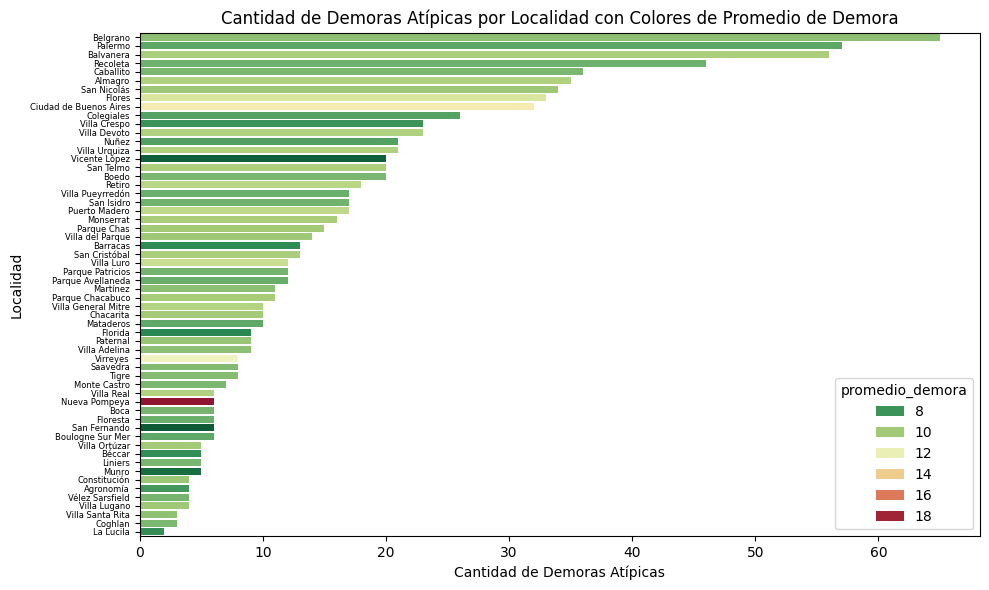

In [22]:
# Paso 1: Filtrar localidades con al menos 50 registros
conteo_localidades = df_filtrado['localidad'].value_counts()
localidades_con_mas_50_registros = conteo_localidades[conteo_localidades >= 50].index
df_filtrado_50 = df_filtrado[df_filtrado['localidad'].isin(localidades_con_mas_50_registros)]

# Paso 2: Calcular los outliers por localidad
outliers_count = []
promedio_demora = []

# Calcular IQR, determinar los outliers y calcular promedio de demora para cada localidad
for localidad in df_filtrado_50['localidad'].unique():
    datos_localidad = df_filtrado_50[df_filtrado_50['localidad'] == localidad]['Demora_Inicio_Fin']
    
    # Promedio de demora
    promedio = datos_localidad.mean()
    promedio_demora.append({
        'localidad': localidad,
        'promedio_demora': promedio
    })
    
    Q1 = datos_localidad.quantile(0.25)
    Q3 = datos_localidad.quantile(0.75)
    IQR = Q3 - Q1
    
    # Determinar los límites inferior y superior
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Contar los outliers
    outliers = datos_localidad[(datos_localidad < limite_inferior) | (datos_localidad > limite_superior)]
    outliers_count.append({
        'localidad': localidad,
        'outliers': len(outliers)
    })

# Crear un DataFrame con la cantidad de outliers por localidad
outliers_df = pd.DataFrame(outliers_count)
# Crear un DataFrame con el promedio de demora por localidad
promedio_df = pd.DataFrame(promedio_demora)

# Paso 3: Unir ambos DataFrames (outliers_df y promedio_df)
df_final = pd.merge(outliers_df, promedio_df, on='localidad')

# Paso 4: Ordenar el DataFrame por la cantidad de outliers de mayor a menor
df_final = df_final.sort_values(by='outliers', ascending=False)

# Paso 5: Graficar la cantidad de outliers por localidad con color en función del promedio de demora
plt.figure(figsize=(10, 6))

# Colores basados en el promedio de demora
sns.barplot(x='outliers', y='localidad', data=df_final, palette=sns.color_palette("RdYlGn_r", as_cmap=True), 
            hue='promedio_demora')

plt.title('Cantidad de Demoras Atípicas por Localidad con Colores de Promedio de Demora')
plt.xlabel('Cantidad de Demoras Atípicas')
plt.ylabel('Localidad')

# Reducir el tamaño de la fuente de las etiquetas en el eje y
plt.yticks(fontsize=6)  # Ajusta el tamaño de la fuente aquí

plt.tight_layout()
plt.show()

Estudiemos la demora por clientes

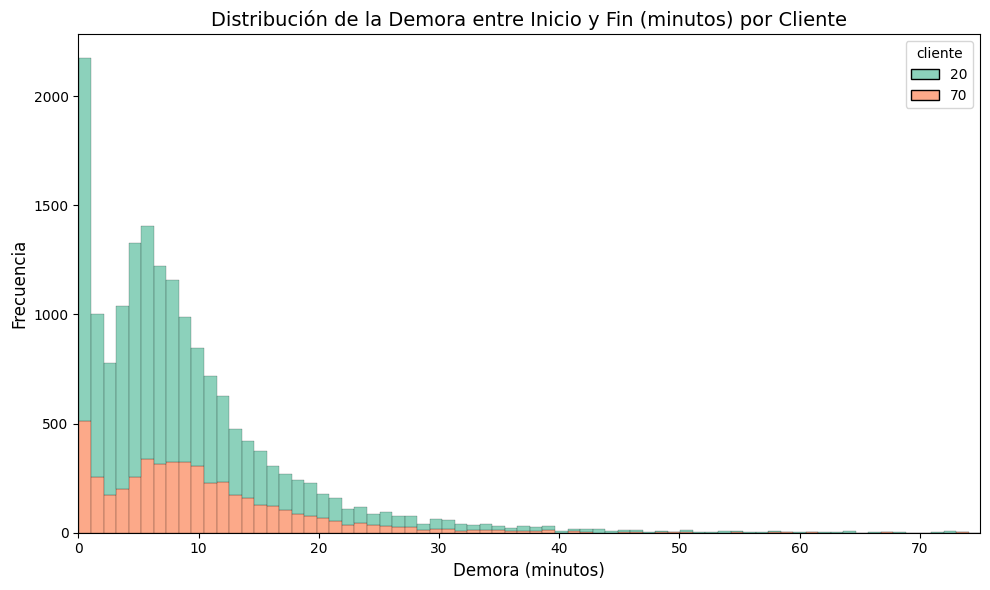

In [23]:
# Filtrar el dataframe para valores de 'Demora_Inicio_Fin' mayores a 0
df_filtrado = df[df['Demora_Inicio_Fin'] > 0]

# Graficar el histograma con diferentes colores por cliente
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtrado, x='Demora_Inicio_Fin', hue='cliente', 
             bins=375, palette='Set2', multiple='stack', edgecolor='black')

# Configuración del gráfico
plt.title('Distribución de la Demora entre Inicio y Fin (minutos) por Cliente', fontsize=14)
plt.xlabel('Demora (minutos)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xlim(0, 75)  # Limitar el eje x hasta 75 minutos

# Mostrar el gráfico
plt.tight_layout()
plt.show()

¿Qué porcentaje de las entregas no tuvieron demora por cada cliente?

C:\Users\anapa\AppData\Local\Temp\ipykernel_16164\468041047.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cliente', y='porcentaje', data=df_porcentajes, palette='viridis')


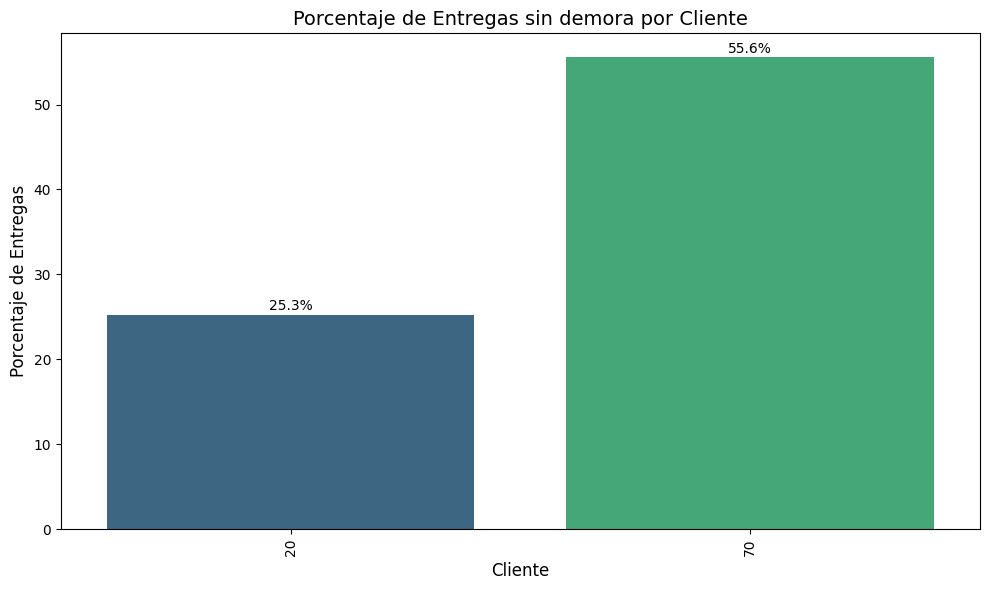

In [24]:
# Paso 1: Calcular el total de entregas por cliente
total_entregas_por_cliente = df.groupby('cliente').size().reset_index(name='total_entregas')

# Paso 2: Calcular las entregas con Demora_Inicio_Fin = 0 por cliente
entregas_cero_por_cliente = df[df['Demora_Inicio_Fin'] == 0].groupby('cliente').size().reset_index(name='entregas_cero')

# Paso 3: Unir ambos DataFrames para tener total de entregas y entregas con demora cero
df_porcentajes = pd.merge(entregas_cero_por_cliente, total_entregas_por_cliente, on='cliente')

# Paso 4: Calcular el porcentaje de entregas con demora = 0
df_porcentajes['porcentaje'] = (df_porcentajes['entregas_cero'] / df_porcentajes['total_entregas']) * 100

# Paso 5: Graficar el porcentaje de entregas con demora = 0 por cliente
plt.figure(figsize=(10, 6))
sns.barplot(x='cliente', y='porcentaje', data=df_porcentajes, palette='viridis')

# Agregar los porcentajes en las barras
for index, row in df_porcentajes.iterrows():
    plt.text(index, row.porcentaje + 0.5, f'{row.porcentaje:.1f}%', ha='center', fontsize=10)

# Configuración del gráfico
plt.title('Porcentaje de Entregas sin demora por Cliente', fontsize=14)
plt.xlabel('Cliente', fontsize=12)
plt.ylabel('Porcentaje de Entregas', fontsize=12)
plt.xticks(rotation=90)  # Rotar las etiquetas de los clientes si hay muchos

# Mostrar el gráfico
plt.tight_layout()
plt.show()

¿Cuales son las 3 localidades con mayor demora de cada cliente?

C:\Users\anapa\AppData\Local\Temp\ipykernel_16164\865954392.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_localidades_por_cliente = promedio_por_localidad_cliente.groupby('cliente').apply(


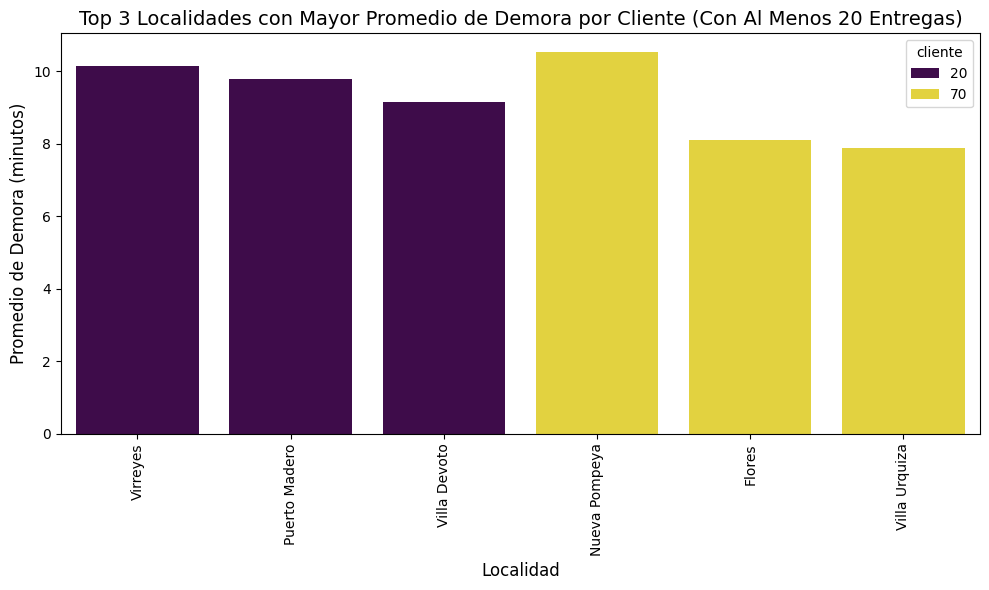

In [25]:
# Paso 1: Contar el número de entregas por localidad y cliente
conteo_por_localidad_cliente = df.groupby(['localidad', 'cliente']).size().reset_index(name='total_entregas')

# Paso 2: Filtrar las combinaciones con al menos 20 entregas
localidades_con_20_entregas = conteo_por_localidad_cliente[conteo_por_localidad_cliente['total_entregas'] >= 20]

# Paso 3: Calcular el promedio de demora por localidad y cliente para las localidades filtradas
df_filtrado = df.merge(localidades_con_20_entregas[['localidad', 'cliente']], on=['localidad', 'cliente'])
promedio_por_localidad_cliente = df_filtrado.groupby(['localidad', 'cliente'])['Demora_Inicio_Fin'].mean().reset_index()

# Paso 4: Seleccionar las 3 localidades con mayor promedio de demora por cliente
top_3_localidades_por_cliente = promedio_por_localidad_cliente.groupby('cliente').apply(
    lambda x: x.nlargest(3, 'Demora_Inicio_Fin')).reset_index(drop=True)

# Paso 5: Graficar los resultados
plt.figure(figsize=(10, 6))
sns.barplot(x='localidad', y='Demora_Inicio_Fin', hue='cliente', data=top_3_localidades_por_cliente, palette='viridis')

# Configuración del gráfico
plt.title('Top 3 Localidades con Mayor Promedio de Demora por Cliente (Con Al Menos 20 Entregas)', fontsize=14)
plt.xlabel('Localidad', fontsize=12)
plt.ylabel('Promedio de Demora (minutos)', fontsize=12)
plt.xticks(rotation=90)  # Rotar las etiquetas de las localidades si es necesario

# Mostrar el gráfico
plt.tight_layout()
plt.show()

¿Habrá alguna explicacion de la demora en los bultos, peso o unidades?

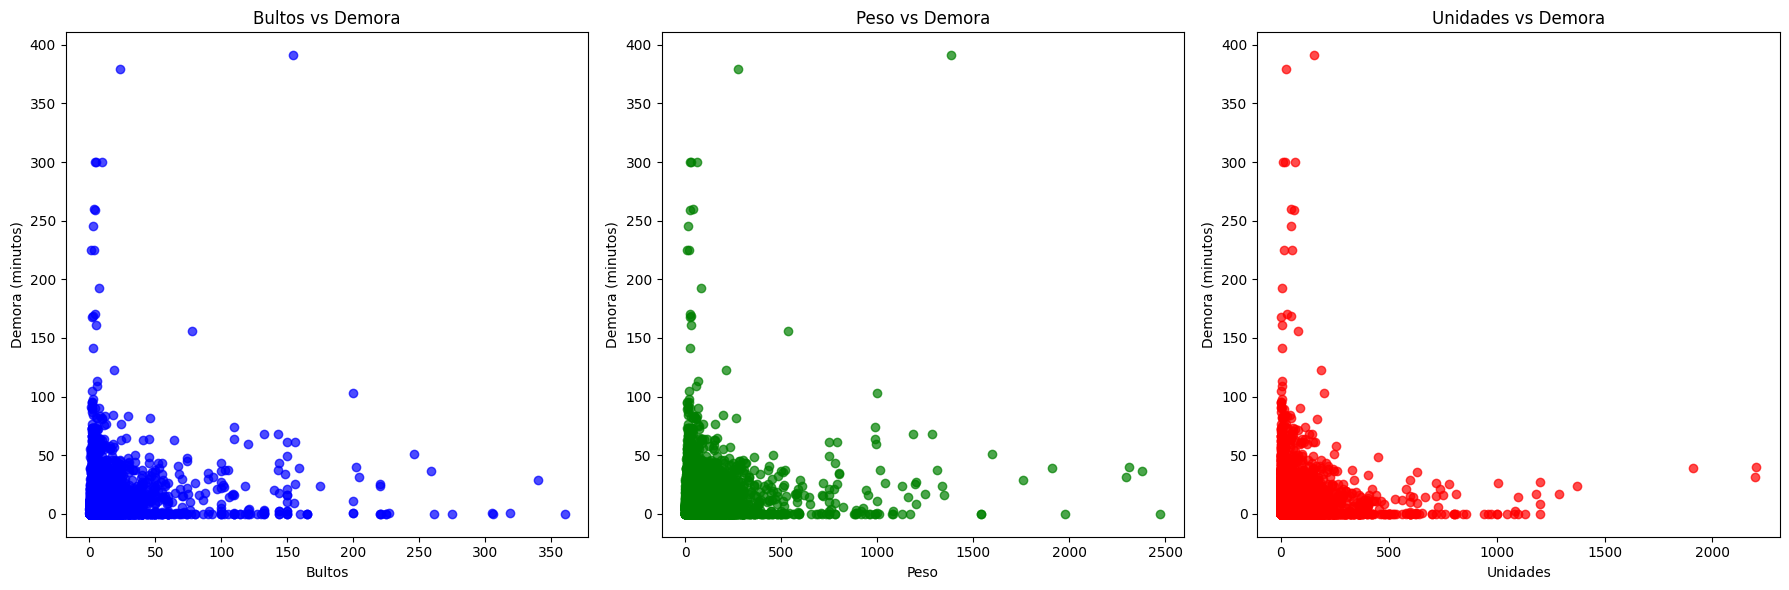

In [26]:
# Crear una figura con 3 subplots (1 fila, 3 columnas)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# Primer gráfico: Bultos vs Demora
axes[0].scatter(df_filtrado['Bultos'], df_filtrado['Demora_Inicio_Fin'], color='blue', alpha=0.7)
axes[0].set_xlabel('Bultos')
axes[0].set_ylabel('Demora (minutos)')
axes[0].set_title('Bultos vs Demora')

# Segundo gráfico: Peso vs Demora
axes[1].scatter(df_filtrado['Peso'], df_filtrado['Demora_Inicio_Fin'], color='green', alpha=0.7)
axes[1].set_xlabel('Peso')
axes[1].set_ylabel('Demora (minutos)')
axes[1].set_title('Peso vs Demora')

# Tercer gráfico: Unidades vs Demora
axes[2].scatter(df_filtrado['Unidades'], df_filtrado['Demora_Inicio_Fin'], color='red', alpha=0.7)
axes[2].set_xlabel('Unidades')
axes[2].set_ylabel('Demora (minutos)')
axes[2].set_title('Unidades vs Demora')

# Ajustar el layout para que no se solapen los títulos y etiquetas
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Estudiemos la demora por dias

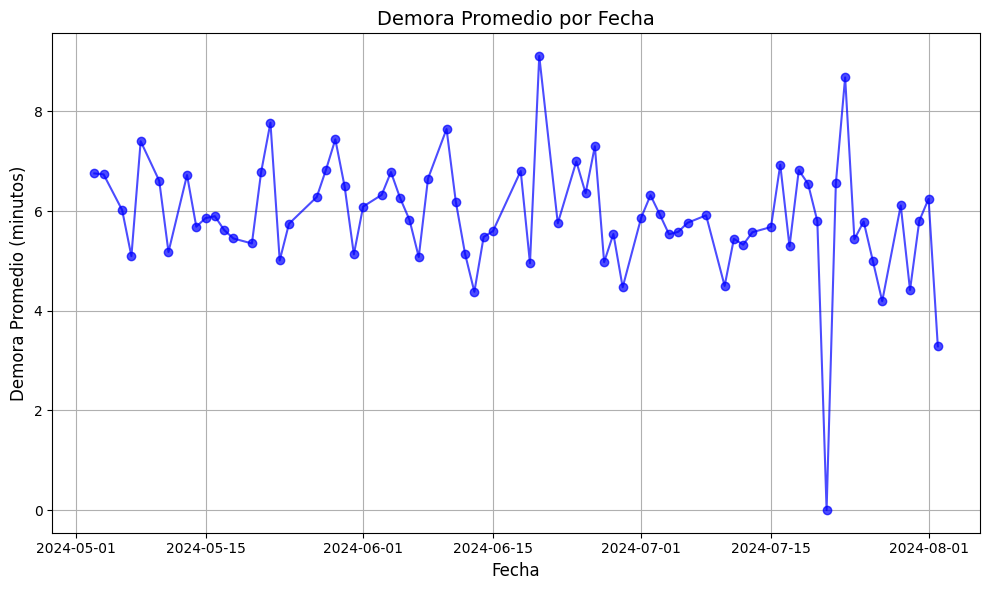

In [27]:
# Asegúrate de que la columna de fecha esté en formato datetime
df_filtrado['VisitaFecha'] = pd.to_datetime(df_filtrado['VisitaFecha'])

# Paso 1: Calcular el promedio de demora por fecha
promedio_demora_fecha = df_filtrado.groupby('VisitaFecha')['Demora_Inicio_Fin'].mean().reset_index()

# Paso 2: Graficar la serie de tiempo
plt.figure(figsize=(10, 6))
plt.plot(promedio_demora_fecha['VisitaFecha'], promedio_demora_fecha['Demora_Inicio_Fin'], marker='o', color='b', alpha=0.7)

# Configuración del gráfico
plt.title('Demora Promedio por Fecha', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Demora Promedio (minutos)', fontsize=12)
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

¿Algún día de la semana tiene una mayor demora promedio?

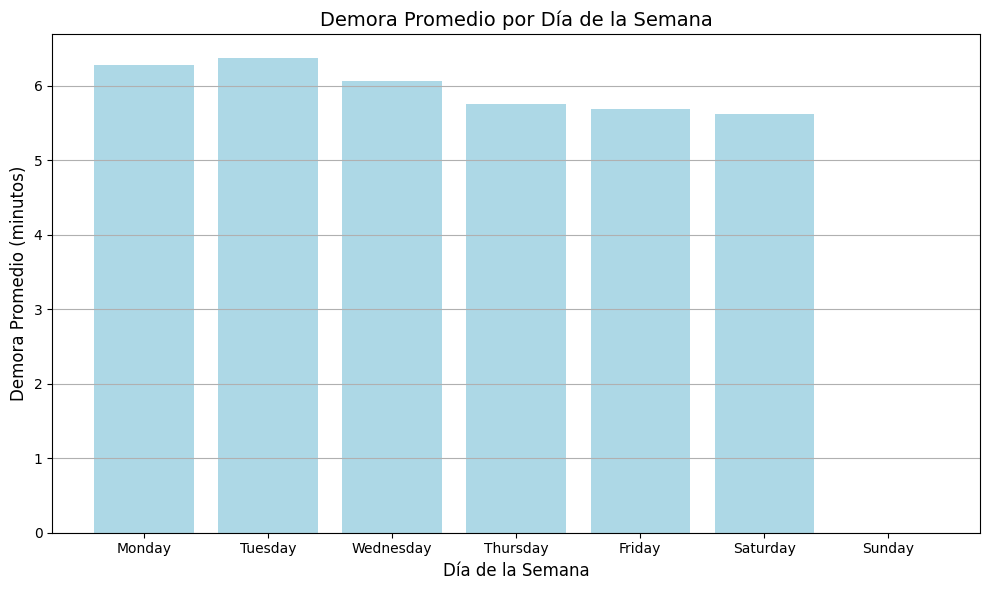

In [28]:
# Asegúrate de que la columna de fecha esté en formato datetime
df_filtrado['VisitaFecha'] = pd.to_datetime(df_filtrado['VisitaFecha'])

# Paso 1: Crear una columna para el día de la semana (lunes = 0, domingo = 6)
df_filtrado['DiaSemana'] = df_filtrado['VisitaFecha'].dt.day_name()

# Paso 2: Calcular el promedio de demora por día de la semana
promedio_demora_dia = df_filtrado.groupby('DiaSemana')['Demora_Inicio_Fin'].mean().reset_index()

# Paso 3: Ordenar los días de la semana en el orden correcto
dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
promedio_demora_dia['DiaSemana'] = pd.Categorical(promedio_demora_dia['DiaSemana'], categories=dias_orden, ordered=True)
promedio_demora_dia = promedio_demora_dia.sort_values('DiaSemana')

# Paso 4: Graficar la demora promedio por día de la semana
plt.figure(figsize=(10, 6))
plt.bar(promedio_demora_dia['DiaSemana'], promedio_demora_dia['Demora_Inicio_Fin'], color='lightblue')

# Configuración del gráfico
plt.title('Demora Promedio por Día de la Semana', fontsize=14)
plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Demora Promedio (minutos)', fontsize=12)
plt.grid(True, axis='y', alpha=1)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

    hora_Inicio_unico  Demora_Inicio_Fin
0                 6.0         192.350000
1                 7.0          13.586667
2                 8.0          11.883388
3                 9.0          15.522611
4                10.0          12.329698
5                11.0          11.210545
6                12.0           9.961872
7                13.0           8.830740
8                14.0           6.713304
9                15.0           3.545668
10               16.0           1.488278
11               17.0           0.812125
12               18.0           0.496290
13               19.0           0.803846
14               20.0           0.511346
15               23.0           0.000000


C:\Users\anapa\AppData\Local\Temp\ipykernel_16164\4156378010.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hora_Inicio_unico', y='Demora_Inicio_Fin', data=demora_promedio_por_hora, palette='viridis')


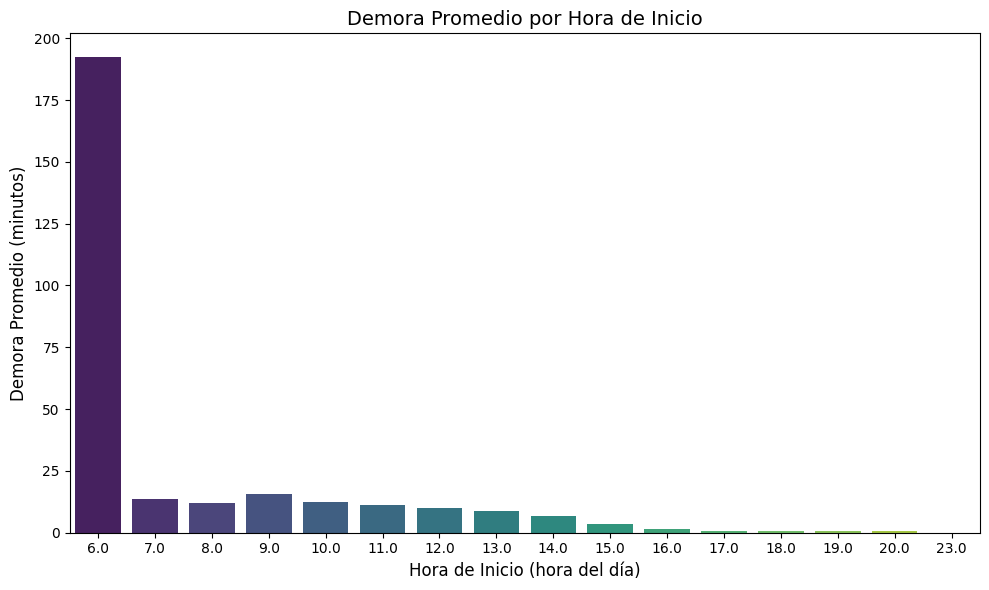

In [29]:
# Extraer la hora de 'VisitaPlanificadaHora' y guardarla en una nueva columna 'hora_Inicio_unico'
df_filtrado['hora_Inicio_unico'] = df_filtrado['VisitaHora_Inicio'].dt.hour

# Calcular la demora promedio por cada hora de inicio
demora_promedio_por_hora = df_filtrado.groupby('hora_Inicio_unico')['Demora_Inicio_Fin'].mean().reset_index()

# Verificar que el DataFrame de demora promedio no esté vacío
print(demora_promedio_por_hora)

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x='hora_Inicio_unico', y='Demora_Inicio_Fin', data=demora_promedio_por_hora, palette='viridis')
plt.title('Demora Promedio por Hora de Inicio', fontsize=14)
plt.xlabel('Hora de Inicio (hora del día)', fontsize=12)
plt.ylabel('Demora Promedio (minutos)', fontsize=12)
plt.tight_layout()
plt.show()

<Axes: >

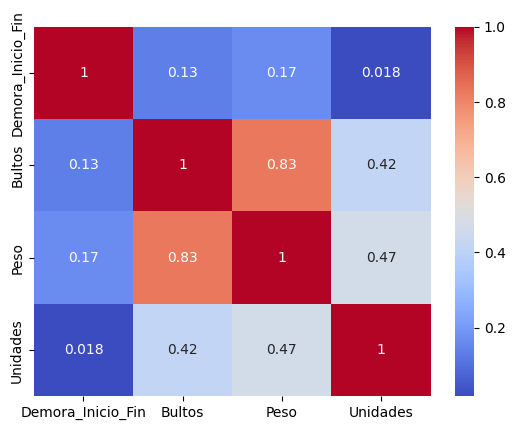

In [30]:
corr = df_filtrado[['Demora_Inicio_Fin', 'Bultos', 'Peso', 'Unidades']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

#Probar con kendall, spearman

### Mapas Interactivos

In [31]:
# df = df.dropna(subset=['latitud', 'longitud'])

# Agrupar por localidad y calcular la cantidad total de repartos y las coordenadas promedio
repartos_por_localidad = df.groupby('localidad').agg({
        'latitud': 'mean',
        'longitud': 'mean',
        'localidad': 'size'
    }).rename(columns={'localidad': 'cantidad_repartos'}).reset_index()

# Crear el mapa centrado en Buenos Aires
m = folium.Map(location = [-34.603722, -58.381592], zoom_start = 12)

# Añadir un círculo por localidad con información de repartos
for i, row in repartos_por_localidad.iterrows():
    folium.CircleMarker(
        location    = [row['latitud'], row['longitud']],
        radius      = np.log(row['cantidad_repartos']) * 5,  # Ajustar el tamaño del círculo
        popup       = f"Localidad: {row['localidad']}<br>Cantidad de repartos: {row['cantidad_repartos']}",
        color       = 'blue',
        fill        = True,
        fill_color  = 'blue'
    ).add_to(m)

# Añadir un HeatMap basado en las coordenadas promedio de cada localidad
heat_data = [[row['latitud'], row['longitud'], row['cantidad_repartos']] for index, row in repartos_por_localidad.iterrows()]
HeatMap(heat_data).add_to(m)

# Guardar el mapa en un archivo HTML
m.save("heatmap_por_localidad_buenos_aires.html")

# Mostrar el mapa (si estás en Jupyter Notebook)
m